# Исследование объявлений о продаже квартир


# Описание задачи
В нашем распоряжении данные сервиса Яндекс. Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

# План работ
1. Загрузка и обзор данных
2. EDA (Исследовательский анализ данных)
3. Вывод.

# Описание данных

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` —число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` —расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` —  этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` —площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — свободная планировка (булев тип)
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` —  число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении
* `airports_nearest` — расстояние до ближайшего аэропорта в мет

# 1. Загрузка и обзор данных

Откроем файл с данными и изучим общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('/content/real_state_eda.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [5]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

In [6]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

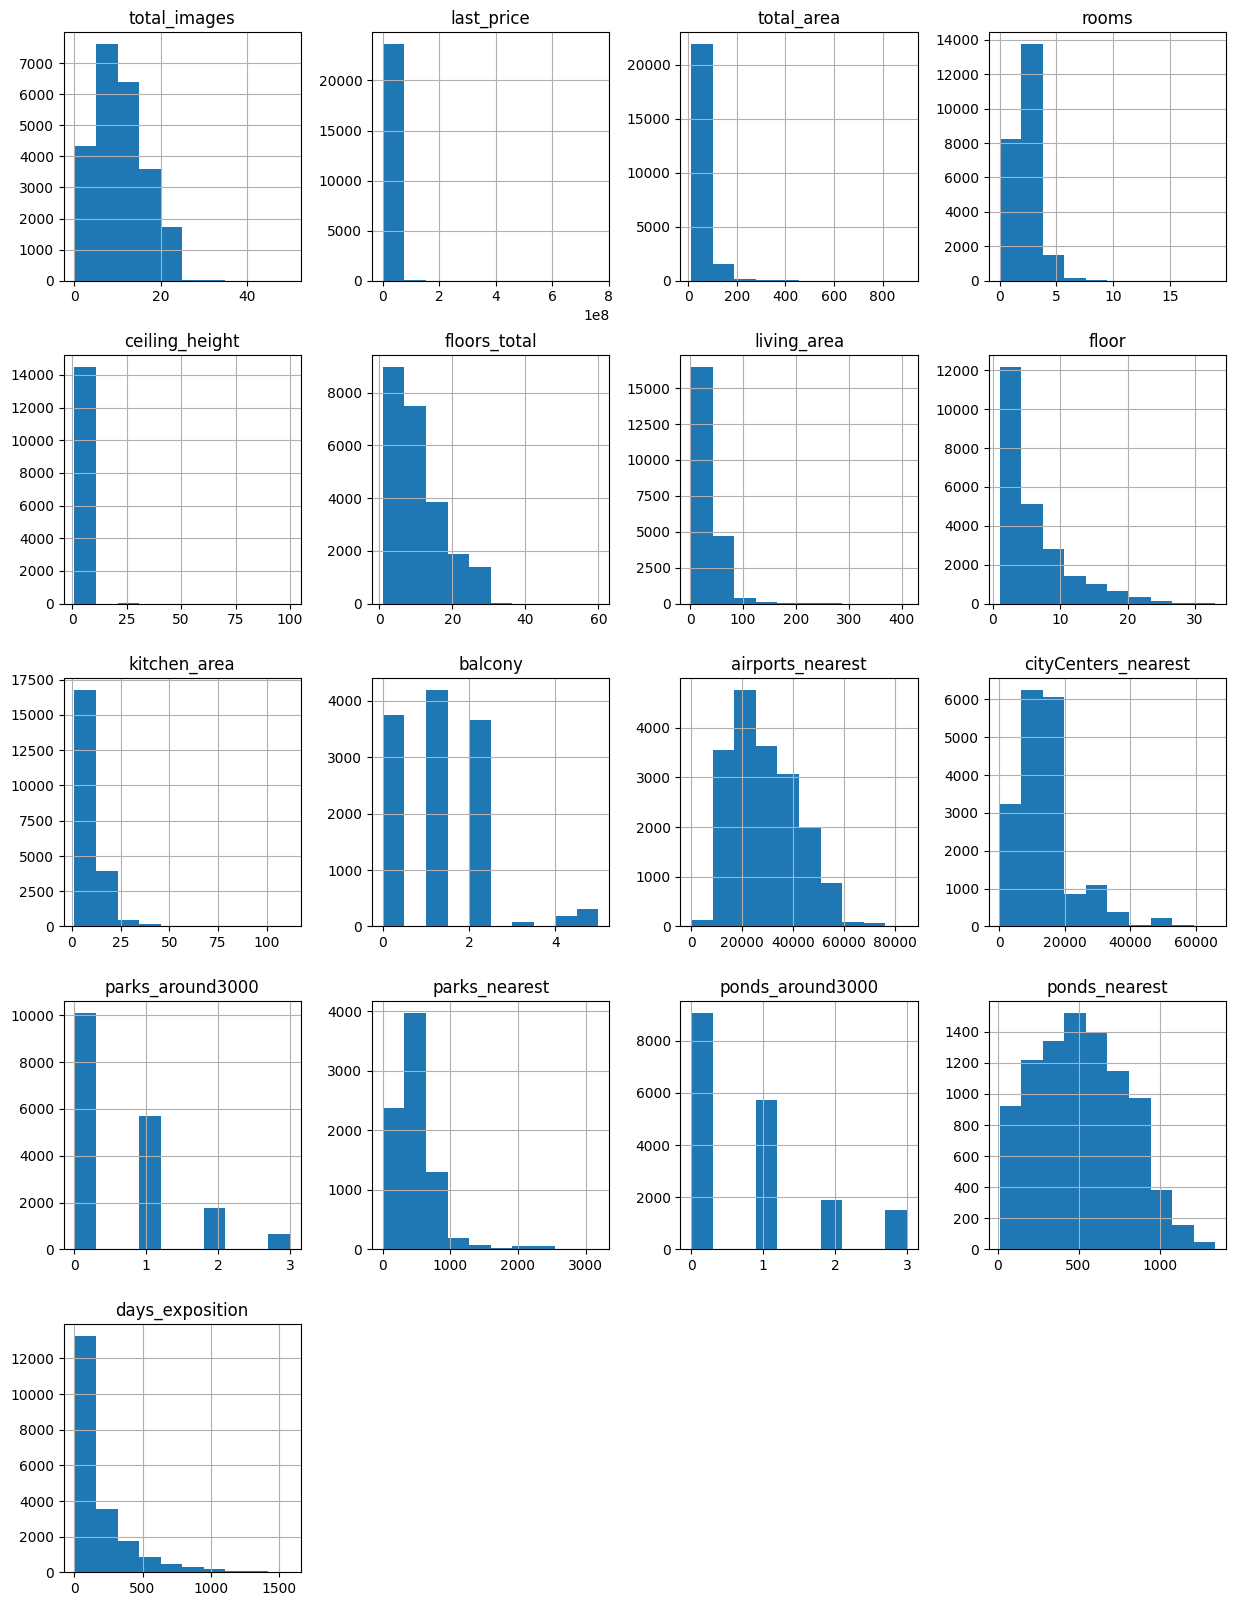

In [7]:
df.hist(figsize=(15,20))


Очень много пропусков в столбце is_apartment. Значения в столбцах со стоимостью квартиры, высотой потолков, количеством комнат и общей площадьюсильно выделяются на общем фоне.

Посчитаем и добавим в таблицу новые столбцы

In [8]:
df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

In [9]:
df = df.drop('is_apartment', axis=1)

удаляем столбец 'is_apartment' аппартаменты потому что он не информативен 88% пропусков  

parks_nearest 0.659100

ponds_nearest 0.615596

ceiling_height 0.290223

airports_nearest 0.233850

cityCenters_nearest 0.232879

ponds_around3000 0.232837

parks_around3000 0.232837

days_exposition 0.134225

данные пропуски тоже являються данными оставим их в таком виде дабы неискажать данные, причины могут имет технический характер или человеческий фактор

In [10]:
df['last_price'] = df['last_price'].astype('Int64')

Цена должна быть целым числом

In [11]:
df['floors_total'] = df['floors_total'].astype('Int64')

floors_total сделаем целым так как  floors изначально целое

In [12]:
df['balcony'] = df['balcony'].fillna(0.).astype('int')

предположим что если не указан балкон его нет заменяем на 0

In [13]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())

 Заменим для дальнейших расчетов

In [14]:
df['locality_name'].str.replace('(?:поселок городского типа)|(?:посёлок городского типа)|(?:посёлок)|(?:городской посёлок)|(?:городской поселок)', 'поселок', regex=True)

0            Санкт-Петербург
1             поселок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

In [15]:
df['locality_name'] = df['locality_name'].replace('поселок городского типа Рябово', 'посёлок городского типа Рябово')

заменим на 'поселок' различные варриации в названиях и  поселок городского типа Рябово на Рябово

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

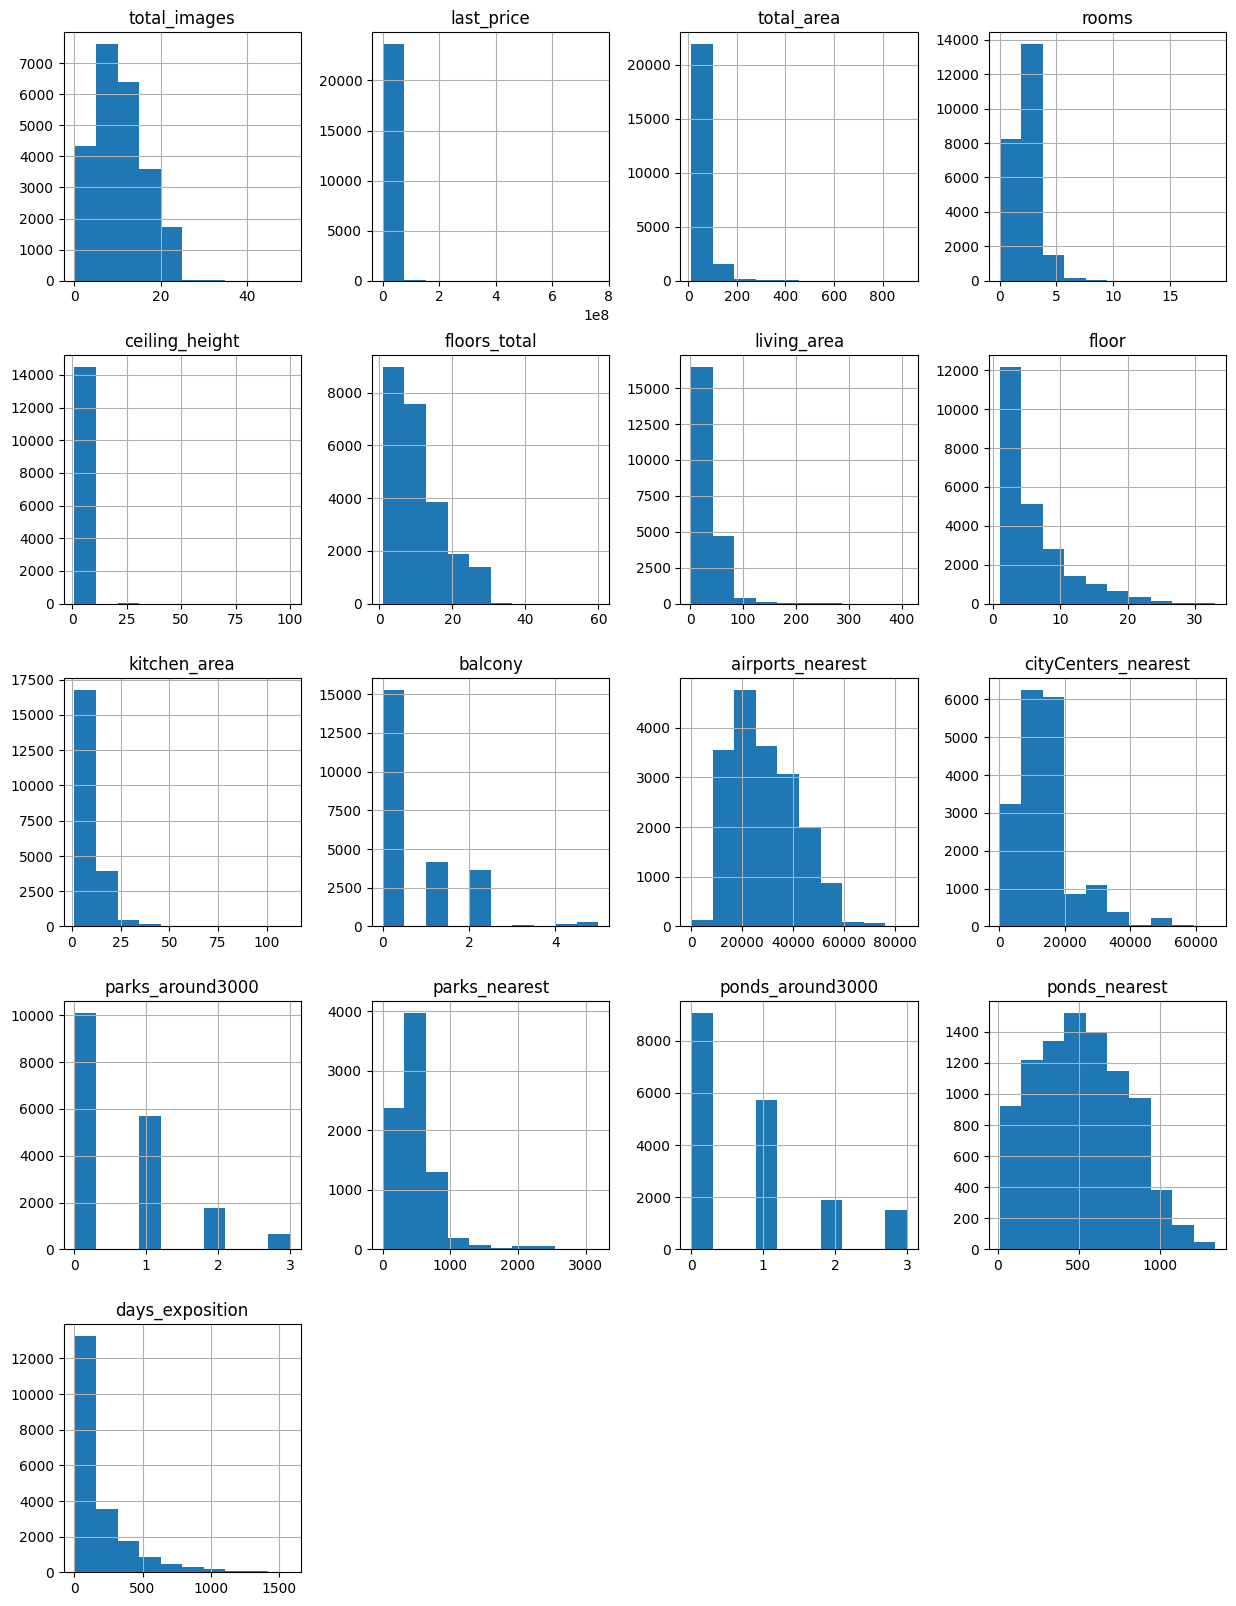

In [16]:
df.hist(figsize=(15,20))

In [17]:
df['ceiling_height'] = df['ceiling_height'].fillna(0.).astype('int')

In [18]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform('median'))

заменим пропуски на медианные значения сгрупировав по колличеству этажей

In [19]:
df['ceiling_height'] = df.loc[(df['ceiling_height']>=20),['ceiling_height']]/10

аномальные значение потолков больше 20 приведем к норме

In [20]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform('median'))

заменим пропуски на медианные значения сгрупировава по колличеству этажей

In [21]:
df = df[df['last_price']<=20000000].copy()

In [22]:
df = df[df['rooms']<=10].copy()

In [23]:
df = df[df['total_area']<=2000].copy()

исправим аномальные значение цены, колличества комнат и общей площади

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

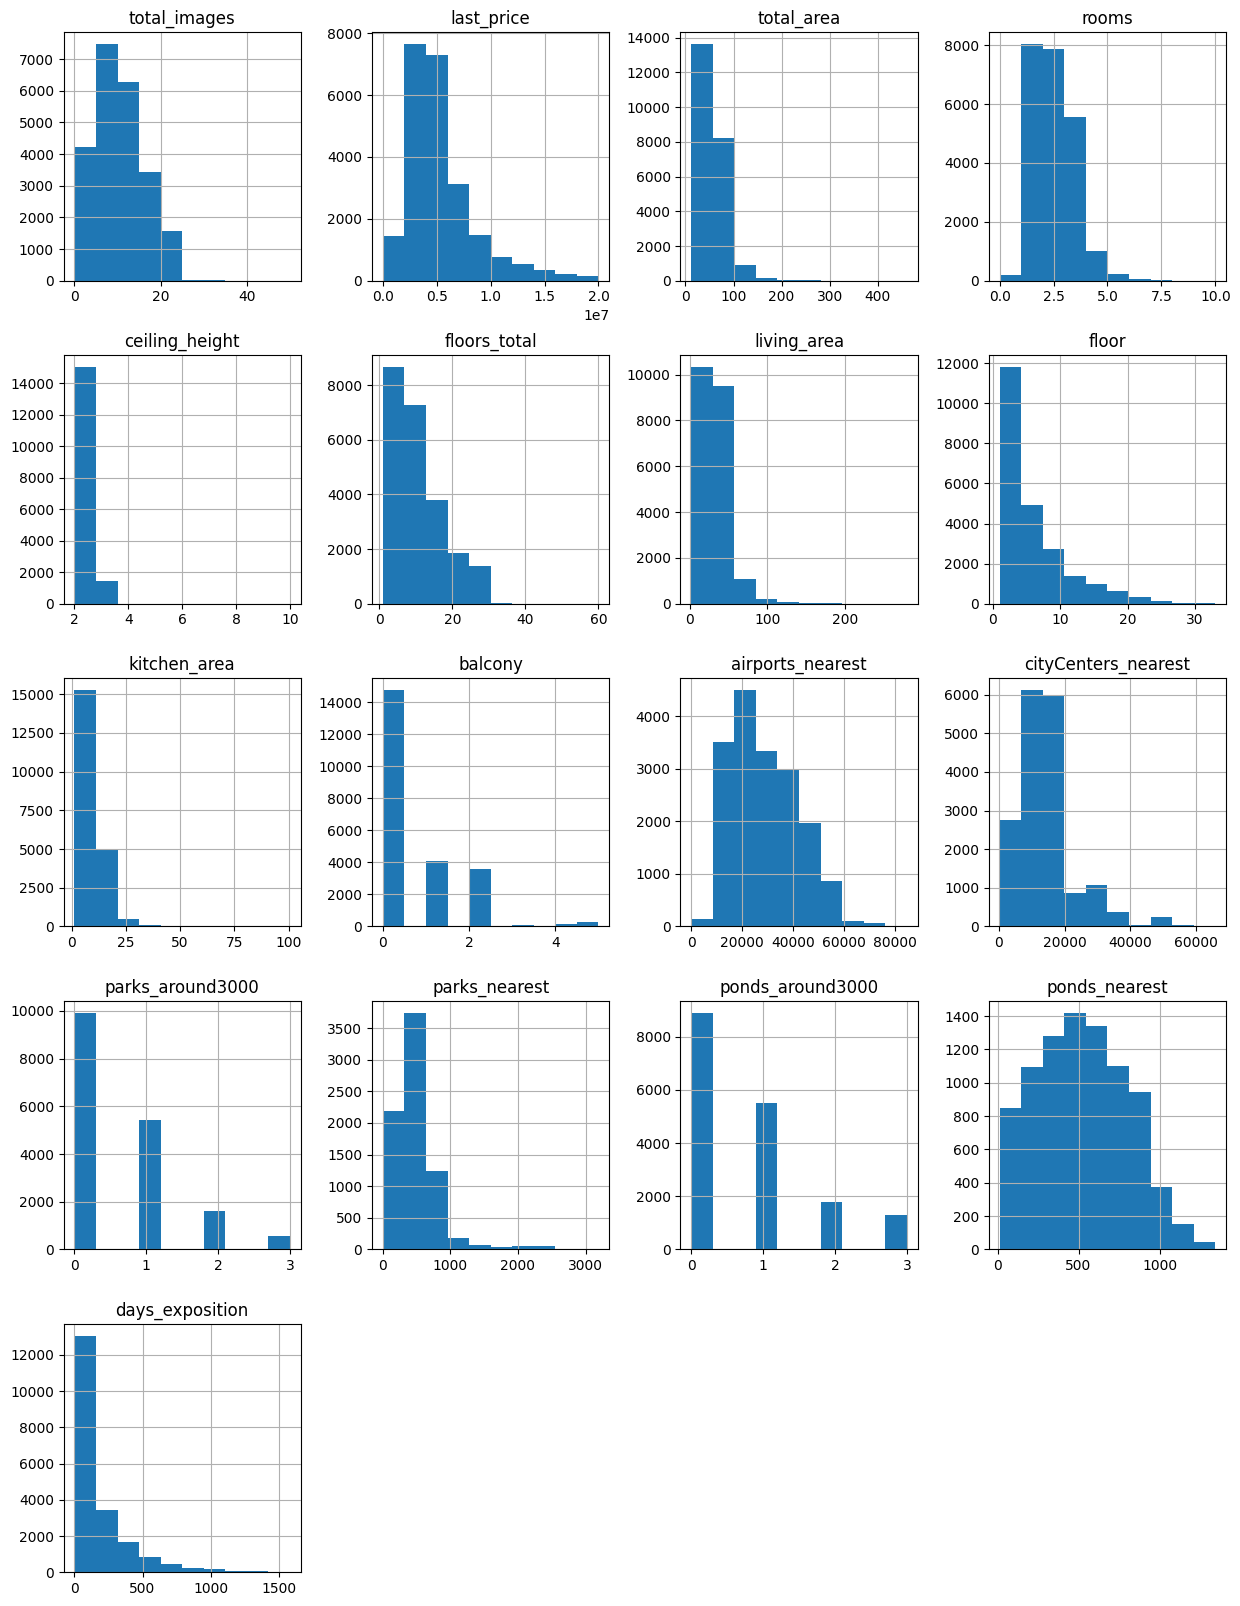

In [24]:
df.hist(figsize=(15,20))

#  2. EDA (Исследовательский анализ данных)

In [25]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07T00:00:00,3,NaN,16,51.0,8,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04T00:00:00,1,NaN,11,18.6,1,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.5,5,34.3,4,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,2.2,14,32.0,13,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10T00:00:00,1,NaN,12,14.4,5,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21T00:00:00,3,2.5,5,73.3,3,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000,59.00,2018-01-15T00:00:00,3,2.5,5,38.0,4,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000,56.70,2018-02-11T00:00:00,2,3.2,3,29.7,1,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76.75,2017-03-28T00:00:00,2,2.0,17,NaN,12,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [26]:
df['price_of_meter'] = df['last_price']/df['total_area'] # цена одного квадратного метра

In [27]:
df['weekday'] = pd.to_datetime(df['first_day_exposition']).dt.weekday #день недели публикации объявления

In [28]:
df['month'] = pd.to_datetime(df['first_day_exposition']).apply(lambda x: x.month) # месяц публикации объявления

In [29]:
df['year'] = pd.to_datetime(df['first_day_exposition']).apply(lambda x: x.year) # год публикации объявления

напишем функцию для создания столбца floor_tupes «первый», «последний», «другой»

In [30]:
def floor_tupes(category):
    if category['floor'] == 1:
        return 'первый'
    if category['floor'] == category['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [31]:
df['floor_tupes'] = df.apply(floor_tupes, axis=1)

In [32]:
df['city_centers_km'] = df['cityCenters_nearest']/1000  # расстояние до центра города в километрах, сделаем в новом столбце

In [33]:
df['city_centers_km'] = round(df['city_centers_km']) # округлим значения

In [34]:
df['cityCenters_nearest'] = round(df['cityCenters_nearest'])  # округлим значения

In [35]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_meter,weekday,month,year,floor_tupes,city_centers_km
0,20,13000000,108.00,2019-03-07T00:00:00,3,NaN,16,51.0,8,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37037,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04T00:00:00,1,NaN,11,18.6,1,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20T00:00:00,2,2.5,5,34.3,4,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000,100.00,2018-06-19T00:00:00,2,2.2,14,32.0,13,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10T00:00:00,1,NaN,12,14.4,5,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21T00:00:00,3,2.5,5,73.3,3,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,другой,4.0
23695,14,3100000,59.00,2018-01-15T00:00:00,3,2.5,5,38.0,4,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.372881,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11T00:00:00,2,3.2,3,29.7,1,False,False,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.710758,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28T00:00:00,2,2.0,17,NaN,12,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.400651,1,3,2017,другой,10.0


In [36]:
q1 = df['total_area'].quantile(0.04)

In [37]:
q2 = df['total_area'].quantile(0.95)

<Axes: >

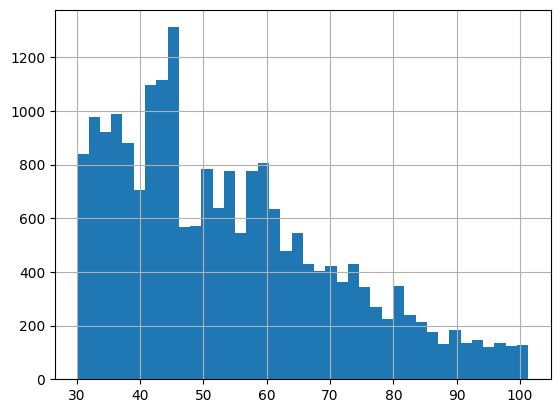

In [38]:
df[df['total_area'].between(q1,q2)]['total_area'].hist(bins=40)

большая часть жилья имеет общую площадь от 30 до 100 м

In [39]:
q1 = df['living_area'].quantile(0.04)

In [40]:
q2 = df['living_area'].quantile(0.95)

<Axes: >

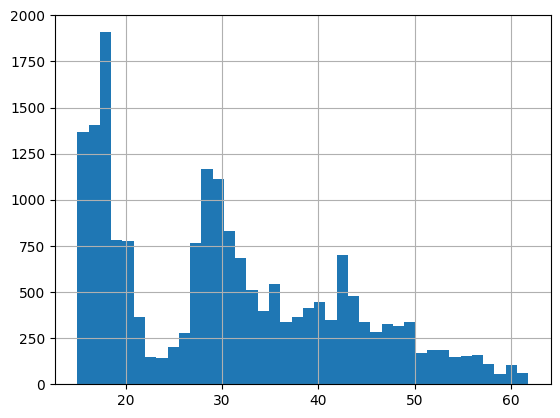

In [41]:
df[df['living_area'].between(q1,q2)]['living_area'].hist(bins=40)

большая часть жилой площади от 10 до 50 метров, с характерными пиками 18 м и 30 м

In [42]:
q1 = df['kitchen_area'].quantile(0.05)

In [43]:
q2 = df['kitchen_area'].quantile(0.95)

<Axes: >

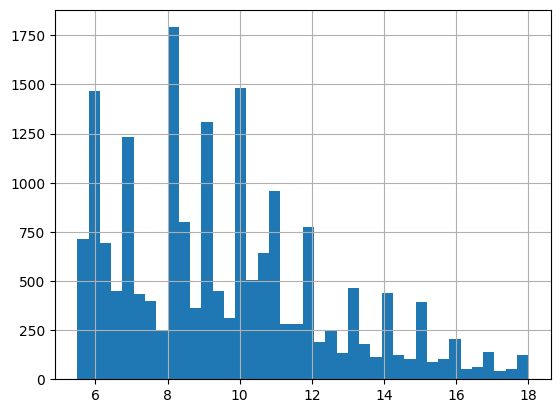

In [44]:
df[df['kitchen_area'].between(q1,q2)]['kitchen_area'].hist(bins=40)

большая часть кухонь находиться в диапазоне 5-12 метров схарактерными пиками 6, 7, 8, 9, 10, 11, 12 м-вероятно это типовые кухни в типовых многоэтажках

In [45]:
q1 = df['last_price'].quantile(0.05)

In [46]:
q2 = df['last_price'].quantile(0.95)

<Axes: >

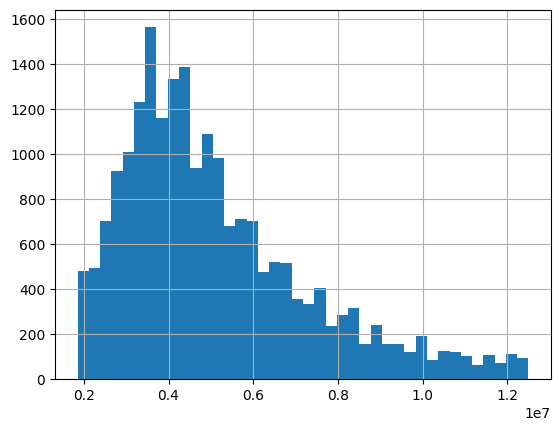

In [47]:
df[df['last_price'].between(q1,q2)]['last_price'].hist(bins=40)

цена от 200 до 800 тыс пик 400 тыс

In [48]:
q1 = df['rooms'].quantile(0.05)

In [49]:
q2 = df['rooms'].quantile(0.95)

<Axes: >

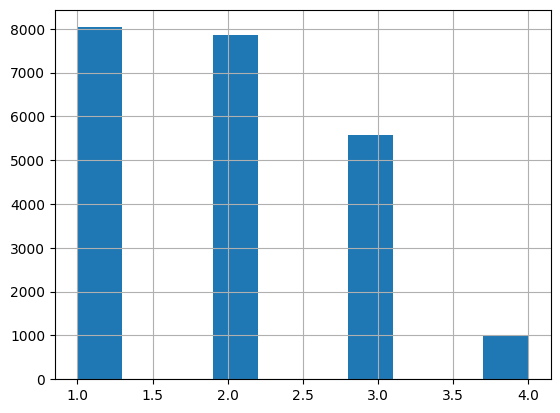

In [50]:
df[df['rooms'].between(q1,q2)]['rooms'].hist(bins=10)

большинство 1,2,3-х комнатные и совсем немного 4-х комнатные

In [51]:
q1 = df['ceiling_height'].quantile(0.05)

In [52]:
q2 = df['ceiling_height'].quantile(0.95)

<Axes: >

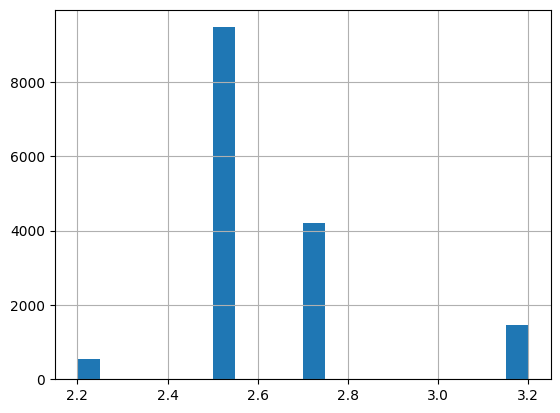

In [53]:
df[df['ceiling_height'].between(q1,q2)]['ceiling_height'].hist(bins=20)

преимущественно высота потолков 2,5 и 2,7 м с небольшими краями в 2,2 и 3,2 м

In [54]:
q1 = df['floor'].quantile(0.05)

In [55]:
q2 = df['floor'].quantile(0.95)

<Axes: >

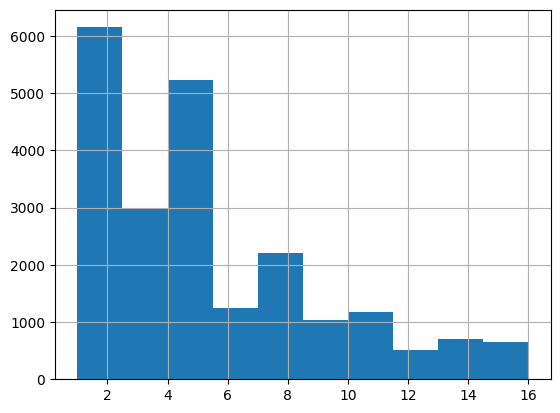

In [56]:
df[df['floor'].between(q1,q2)]['floor'].hist(bins=10)

 от 1 до 9 этажей

<Axes: >

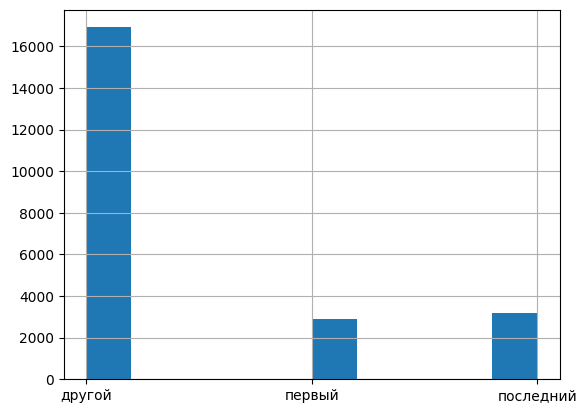

In [57]:
df['floor_tupes'].hist(bins=10)

боьшинство этажей между первым и поледним этажём

In [58]:
q1 = df['floors_total'].quantile(0.05)

In [59]:
q2 = df['floors_total'].quantile(0.95)

<Axes: >

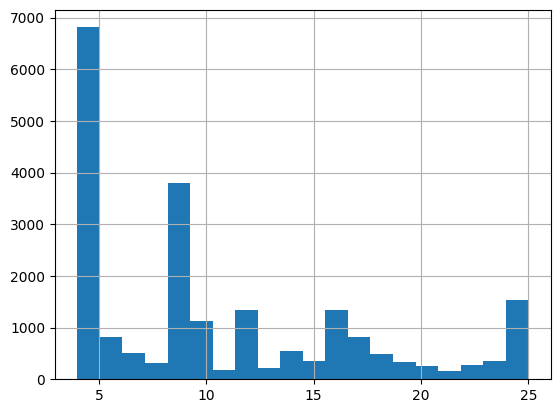

In [60]:
df[df['floors_total'].between(q1,q2)]['floors_total'].hist(bins=20)

от 5 до 25 этажей c пиками 5, 9, 16, 25 этажей

In [61]:
q1 = df['cityCenters_nearest'].quantile(0.05)

In [62]:
q2 = df['cityCenters_nearest'].quantile(0.95)

<Axes: >

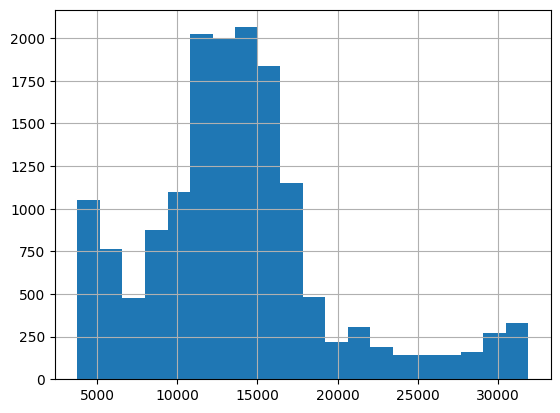

In [63]:
df[df['cityCenters_nearest'].between(q1,q2)]['cityCenters_nearest'].hist(bins=20)

в данных или 0 или пропуск данные бесполезны

In [64]:
q1 = df['airports_nearest'].quantile(0.05)

In [65]:
q2 = df['airports_nearest'].quantile(0.95)

<Axes: >

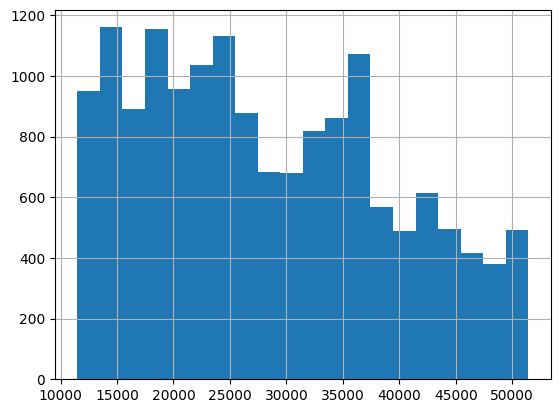

In [66]:
df[df['airports_nearest'].between(q1,q2)]['airports_nearest'].hist(bins=20)

расстояние  до аэропорта от 13 до 50 км

In [67]:
q1 = df['parks_nearest'].quantile(0.05)

In [68]:
q2 = df['parks_nearest'].quantile(0.95)

<Axes: >

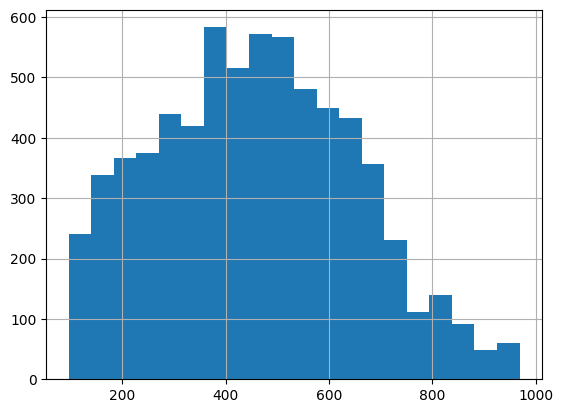

In [69]:
df[df['parks_nearest'].between(q1,q2)]['parks_nearest'].hist(bins=20)

растояние до парка 1 км в пешей доступности

In [70]:
q1 = df['weekday'].quantile(0.05)

In [71]:
q2 = df['weekday'].quantile(0.95)

<Axes: >

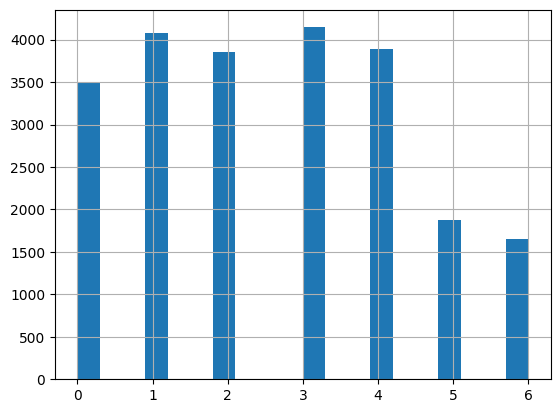

In [72]:
df[df['weekday'].between(q1,q2)]['weekday'].hist(bins=20)

публикации объявлений преимущественно в рабочие дни

In [73]:
q1 = df['month'].quantile(0.05)

In [74]:
q2 = df['month'].quantile(0.95)

<Axes: >

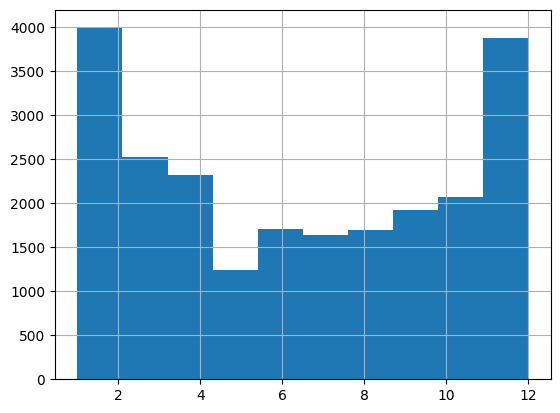

In [75]:
df[df['month'].between(q1,q2)]['month'].hist(bins=10)

публикации объявлений максимум в декабре январе миниму в мае

<Axes: >

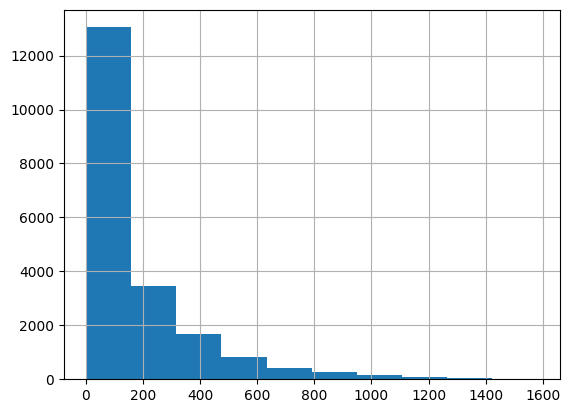

In [76]:
df['days_exposition'].hist()

In [77]:
df['days_exposition'].median() # 95 дней медианные продажи

94.0

In [78]:
df['days_exposition'].mean()  # 180 дней необычайно долгие продажи больше 600 дней

177.84276289484205

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


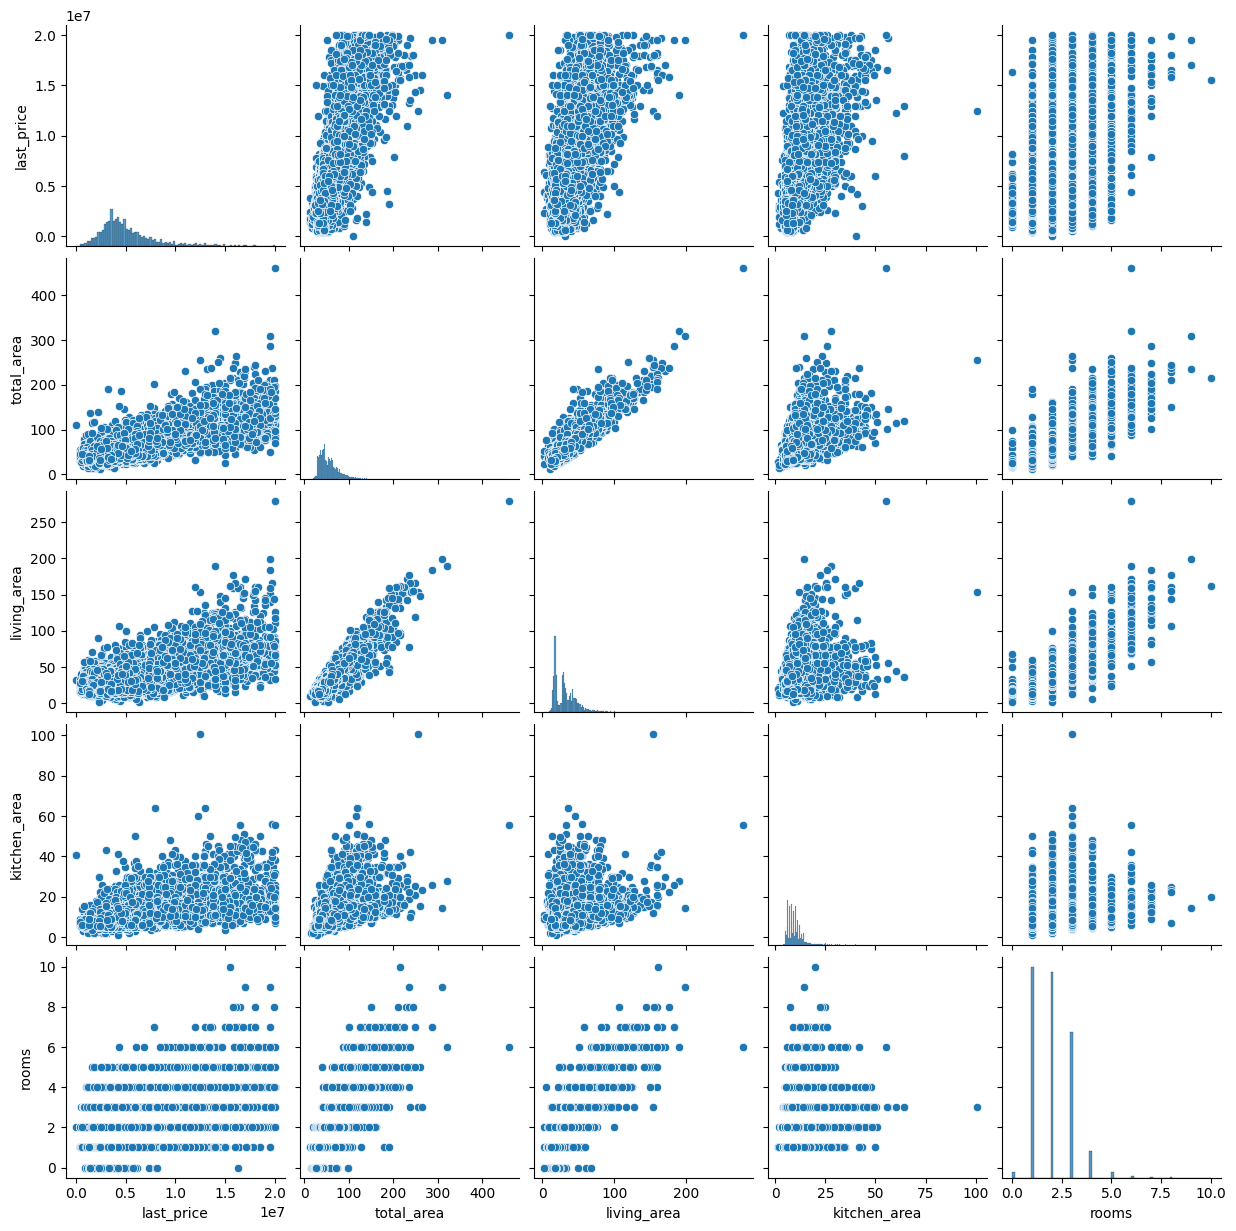

In [79]:
sns.pairplot(df[['last_price','total_area','living_area', 'kitchen_area' ,'rooms']])

<Axes: xlabel='total_area', ylabel='last_price'>

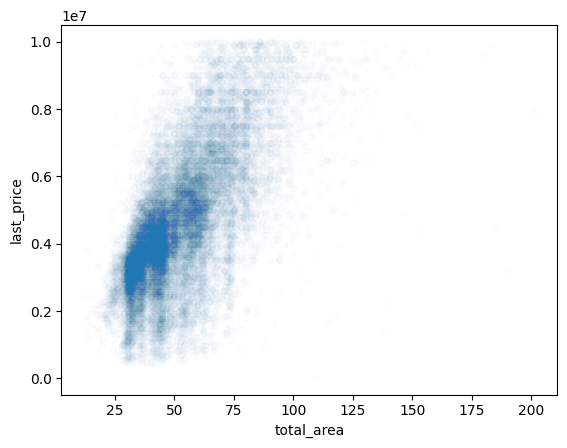

In [80]:
df[df['last_price']<10000000].plot(x='total_area', y='last_price',kind='scatter',alpha=0.01)

зависимость от цены вполне линейная чем больше общая площадь тем больше цена, большинство объявлений находиться в диапазаоне 25-75 метров цена от 200 до 600тыс  

<Axes: xlabel='living_area', ylabel='last_price'>

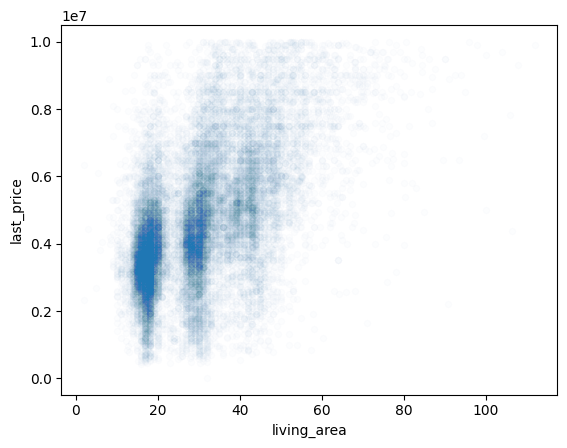

In [81]:
df[df['last_price']<10000000].plot(x='living_area', y='last_price',kind='scatter',alpha=0.01)

зависимость от цены слабо просматриваеться , но интересное значение цены для 18 кв.м объявление входит в полный диапазон цен от 200 до 600 тыс

<Axes: xlabel='kitchen_area', ylabel='last_price'>

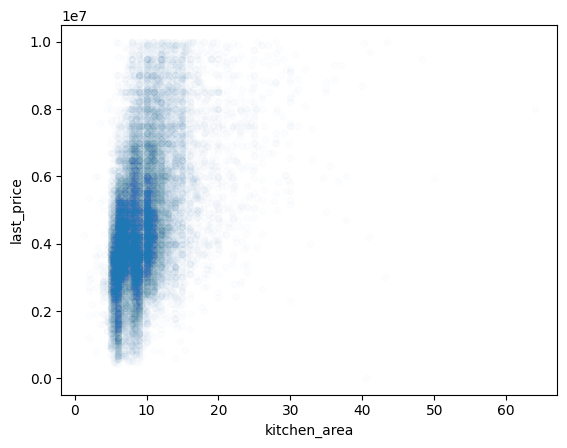

In [82]:
df[df['last_price']<10000000].plot(x='kitchen_area', y='last_price',kind='scatter',alpha=0.01)

зависимости от размера кухни не прослеживается

<Axes: xlabel='rooms', ylabel='last_price'>

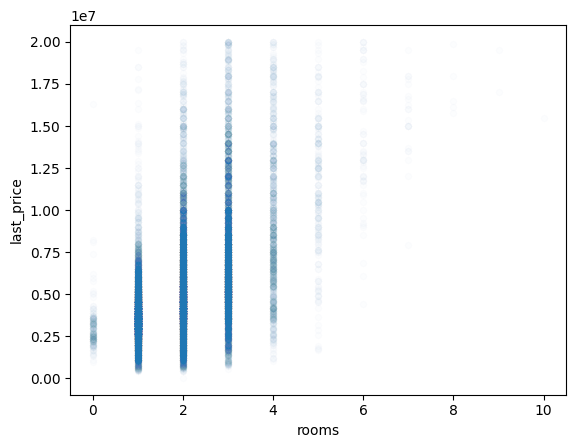

In [83]:
df[df['last_price']<30000000].plot(x='rooms', y='last_price',kind='scatter',alpha=0.01)

нижняя граница не зависит от колличества комнат а верхня граница растет с увеличением комнат но только до 3-х комнат

In [84]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'studio', 'open_plan', 'kitchen_area', 'balcony', 'locality_name',
       'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
       'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition',
       'price_of_meter', 'weekday', 'month', 'year', 'floor_tupes',
       'city_centers_km'],
      dtype='object')

In [85]:
df[['last_price','total_area', 'living_area', 'kitchen_area','rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.770864,0.667814,0.576352,0.513552
total_area,0.770864,1.000000,0.927964,0.531947,0.796368
living_area,0.667814,0.927964,1.000000,0.297330,0.876751
kitchen_area,0.576352,0.531947,0.297330,1.000000,0.166051
rooms,0.513552,0.796368,0.876751,0.166051,1.000000


<Axes: >

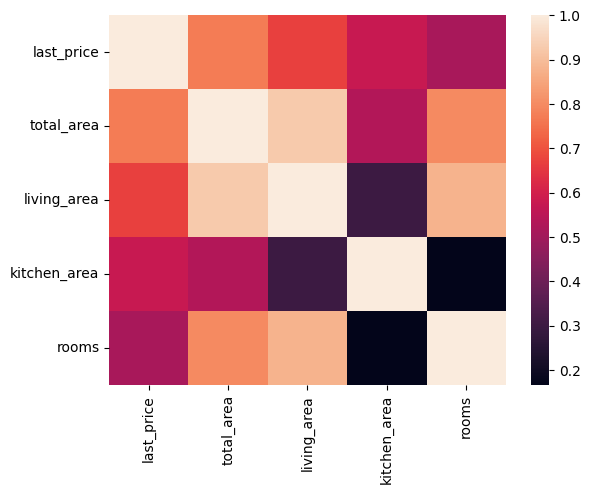

In [86]:
sns.heatmap(df[['last_price','total_area', 'living_area', 'kitchen_area','rooms']].corr())

выявлена минимальная зависимость между колличеством комнат и площадью кухни

<Axes: xlabel='floor'>

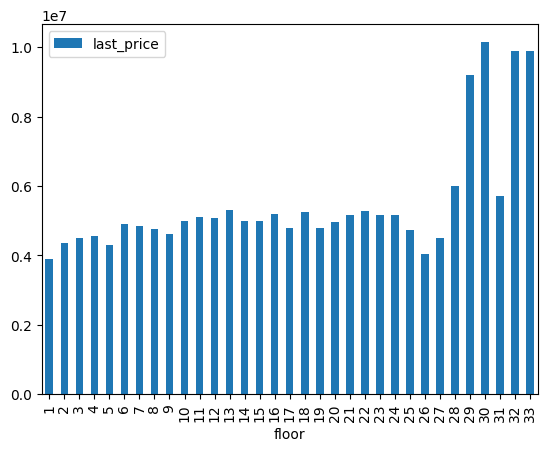

In [87]:
df.pivot_table(index='floor',values='last_price',aggfunc='median').plot.bar()

объекты после 29 этажа дороже

<Axes: xlabel='weekday'>

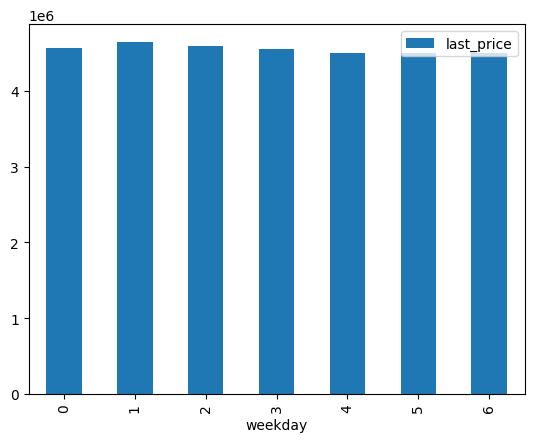

In [88]:
df.pivot_table(index='weekday',values='last_price',aggfunc='median').plot.bar()

по дням недели зависимость от цены не выявлена

<Axes: xlabel='month'>

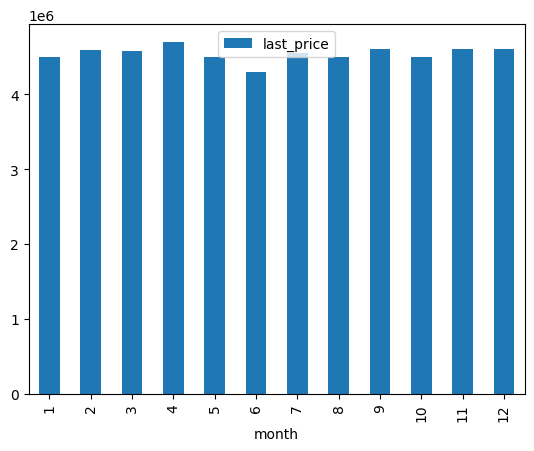

In [89]:
df.pivot_table(index='month',values='last_price',aggfunc='median').plot.bar()

зависимости цены от месяца подажи объявления не прослеживается

<Axes: xlabel='year'>

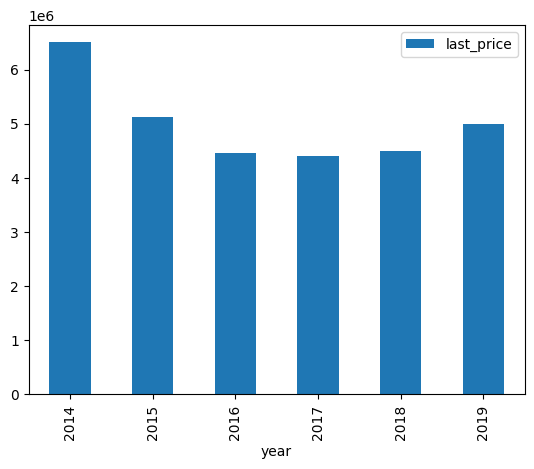

In [90]:
df.pivot_table(index='year',values='last_price',aggfunc='median').plot.bar()

снижение цен с 2014 по 2017 с последующей небольшой коррекцией

In [91]:
top_10_city = df.groupby('locality_name')['price_of_meter'].agg(['count','mean'])

In [92]:
top_10_city = top_10_city.sort_values(by='count',ascending=False)[:10]

In [93]:
top_10_city.sort_values(by='mean',ascending=False)[:10]

,count,mean
locality_name,,
Санкт-Петербург,15032,108683.603557
Пушкин,360,101788.572053
деревня Кудрово,299,92473.547576
посёлок Парголово,327,90175.913458
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Колпино,337,75333.295801
Гатчина,307,68746.146763
Всеволожск,397,67214.252635


в Санкт-Петербурге подавляющее количество объектов по максимальной цене

In [94]:
top_10_city['mean'].max()

108683.60355711132

In [95]:
top_10_city['mean'].min()

58141.90915331862

In [96]:
top_city = df[df['locality_name'] =='Санкт-Петербург'].groupby('city_centers_km')['last_price'].agg(['count','mean'])

In [97]:
top_city['km'] = top_city['mean']/df['city_centers_km']

<Axes: xlabel='city_centers_km'>

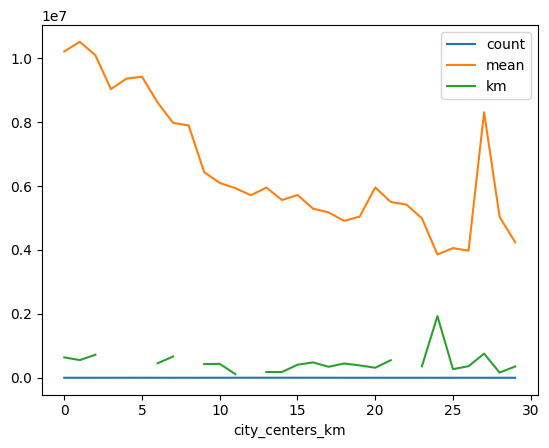

In [98]:
top_city.plot()

cтоимость объектов зависит от расстояния до центра города-чем ближе к центру города тем выше стоимость объектов недвижимости

# 3.  Общий вывод

 Большая часть жилья имеет общую площадь от 30 до 100 м, жилой площади от 10 до 50 метров, кухни находиться в диапазоне 5-12 метров, цена от 200 до 800 тыс пик 400 тыс большинство 1,2,3-х комнатные и совсем немного 4-х комнатные, этажность от 1 до 9 этажей c пиками 5, 9, 16, 25 этажей, расстояние  до аэропорта от 13 до 50 км, растояние до парка 1 км в пешей доступности. Можно сделать вывод что в данных преобладает типовое жилье мнгоэтажек в городской черте.
     Публикации объявлений преимущественно в рабочие дни, публикации  максимум в декабре-январе, минимум в мае, 95 дней медианные продажи, зависимость от цены вполне линейная чем больше общая площадь тем больше цена, большинство объявлений находиться в диапазаоне 25-75 метров цена от 200 до 600тыс
    Наблюдалось снижение цен с 2014 по 2017 с последующей небольшой коррекцией. Стоимость объектов зависит от расстояния до центра города-чем ближе к центру города тем выше стоимость объектов недвижимости. В Санкт-Петербурге подавляющее количество объектов по максимальной цене.